In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
data = pd.read_csv('price.csv')
data = data.loc[:, ['REF_DATE', 'GEO', 'Farm products', 'Category', 'CattleType', 'Product_Price']]

data['CattleType'] = data['CattleType'].fillna('None')

scaler = MinMaxScaler(feature_range=(0, 1))
data[['Product_Price']] = scaler.fit_transform(data[['Product_Price']])

data = data.pivot_table(index='REF_DATE', columns=['GEO', 'Farm products', 'Category', 'CattleType'], values = 'Product_Price', aggfunc='first')

data = data.apply(lambda row: row.fillna(row.mean()), axis=1)

In [4]:
data

GEO                    Alberta                            \
Farm products Barley [1151141]      Calves                 
Category                 plant      cattle                 
CattleType                None for_feeding for_slaughter   
REF_DATE                                                   
1992-01-01            0.046615    0.066026      0.064361   
1992-02-01            0.046878    0.070215      0.066460   
1992-03-01            0.047497    0.070446      0.064888   
1992-04-01            0.048825    0.071182      0.068242   
1992-05-01            0.050476    0.072636      0.067144   
...                        ...         ...           ...   
2024-05-01            0.183113    0.265267      0.217632   
2024-06-01            0.185731    0.268115      0.219704   
2024-07-01            0.183330    0.272298      0.220059   
2024-08-01            0.169412    0.260669      0.212238   
2024-09-01            0.152705    0.257952      0.208463   

GEO                                                                           \
Farm products Canola (including rapeseed) [113111]      Cattle                 
Category                                     plant      cattle                 
CattleType                                    None for_feeding for_slaughter   
REF_DATE                                                                       
1992-01-01                                0.153159    0.054574      0.046951   
1992-02-01                                0.155119    0.055002      0.047918   
1992-03-01                                0.160525    0.056212      0.049305   
1992-04-01                                0.159993    0.058021      0.051640   
1992-05-01                                0.162295    0.055646      0.050641   
...                                            ...         ...           ...   
2024-05-01                                0.422957    0.195768      0.164722   
2024-06-01                                0.425614    0.179528      0.166820   
2024-07-01                                0.423536    0.171924      0.163564   
2024-08-01                                0.400001    0.175746      0.160203   
2024-09-01                                0.390622    0.180567      0.154790   

GEO                                                                         \
Farm products Chickens for meat [11113131]          Cows Dry peas [114314]   
Category                           poultry        cattle             plant   
CattleType                            None for_slaughter              None   
REF_DATE                                                                     
1992-01-01                        0.000533      0.030869          0.105603   
1992-02-01                        0.000506      0.033322          0.105603   
1992-03-01                        0.000513      0.034532          0.105603   
1992-04-01                        0.000493      0.034710          0.105603   
1992-05-01                        0.000526      0.036045          0.105603   
...                                    ...           ...               ...   
2024-05-01                        0.001394      0.118179          0.363292   
2024-06-01                        0.001381      0.123033          0.301548   
2024-07-01                        0.001408      0.121876          0.304232   
2024-08-01                        0.001401      0.125158          0.265109   
2024-09-01                        0.001401      0.118455          0.261208   

GEO                                   ... Saskatchewan                \
Farm products Eggs in shell [116111]  ...      Heifers                 
Category                     poultry  ...       cattle                 
CattleType                      None  ...  for_feeding for_slaughter   
REF_DATE                              ...                              
1992-01-01                  0.000125  ...     0.056126      0.047825   
1992-02-01                  0.000118  ...     0.055048      0.047773   
1992-

In [3]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [4]:
SEQ_LENGTH = 10
X, y = create_sequences(data,  SEQ_LENGTH)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
X.shape

(382, 10, 178)

In [5]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(X.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\boots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0088 - val_loss: 0.0112
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2032e-04 - val_loss: 0.0016
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4060e-04 - val_loss: 0.0016
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7374e-04 - val_loss: 0.0015
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1408e-04 - val_loss: 0.0014
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8396e-04 - val_loss: 0.0014
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7286e-04 - val_loss: 0.0014
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6284e-04 - val_loss: 0.0013
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3423e-04 - val_loss: 0.0013
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4937

In [7]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020    
Test Loss: 0.002495305147022009


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


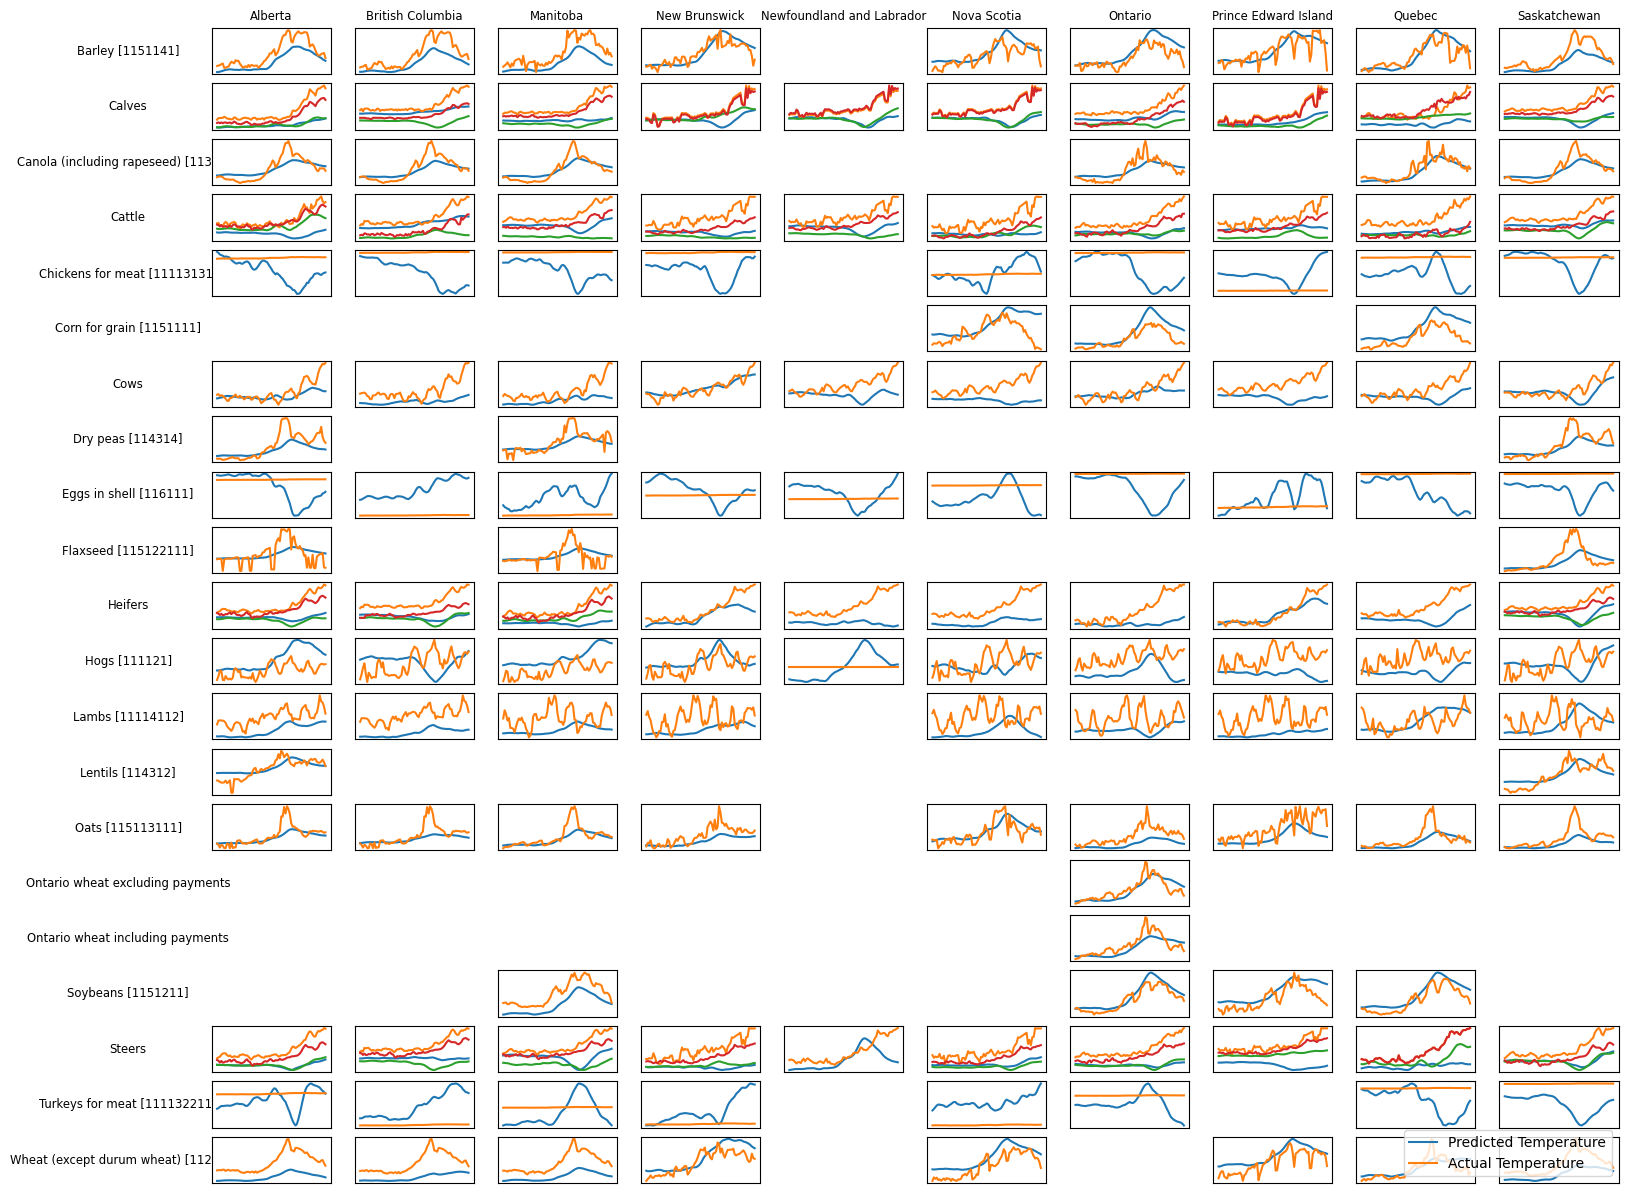

In [8]:
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)

products = np.unique( [c[1] for c in data.columns] )
provinces = np.unique( [c[0] for c in data.columns] )

# Plot the results
import matplotlib.pyplot as plt
#plt.figure(figsize=(21, 15))

fig, axes = plt.subplots(nrows=21, ncols=11, figsize=(20, 15))

for i in range(21):
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    for j in range(0, 11):
        axes[i, j].axis('off')

for i in range(predictions.shape[1]):
    r = np.where(products == data.columns[i][1])[0][0]
    c = np.where(provinces == data.columns[i][0])[0][0] + 1

    axes[r, c].axis('on')

    axes[r, c].plot(predictions[:, i], label='Predicted Temperature')
    axes[r, c].plot(y_test_scaled[:, i], label='Actual Temperature')

    # Optional: Remove the x and y ticks for clarity
    axes[r, c].set_xticks([])
    axes[r, c].set_yticks([])

for j, col in enumerate(provinces):
    axes[0, j+1].set_title(col, size = 'small')

for ax, row in zip(axes[:,0], products):   
    ax.text(0.5, 0.5, row, ha='center', va='center', rotation=0, size='small')
    ax.axis('off')  # Turn off the axis for the label cells

#plt.tight_layout()
plt.legend()
plt.show()